In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set maximum number of displayed rows
pd.set_option('display.max_rows',50)

In [2]:
# Load the dataset into a DataFrame using Pandas
df = pd.read_csv(r'C:\Users\ASUS\Desktop\project\kindle_data.csv')

# Display the first few rows of the DataFrame to check the loaded data
df.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,NaN,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [3]:
#### 2. Explore the Data:
# Display basic information about the dataset, such as the number of rows and columns, data types, and missing values.

# Display column names
df.columns

df.info()  #general information

df.isna().sum()   # Checking for missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              126446 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

asin                     0
title                    0
author                 425
soldBy                9233
imgUrl                   0
productURL               0
stars                    0
reviews                  0
price                 6656
isKindleUnlimited        0
category_id              0
isBestSeller             0
isEditorsPick            0
isGoodReadsChoice        0
publishedDate        49016
category_name            0
dtype: int64

In [4]:
#### 3. Clean the Data:
# Handle any missing values or outliers in the dataset.
# Ensure that data types are appropriate for analysis.

#----------------------------------
# Missing data
# For the author column:

# Fill empty authors with "Ann M. Martin" for titles containing "Baby-Sitters"
df.loc[df['title'].str.contains("Baby-Sitters") & df['author'].isna(), 'author'] = 'Ann M. Martin'

# For the soldBy column:
# If the author is 'James Patterson' and 'soldBy' is empty, write 'Hachette Book Group'
df.loc[(df['author'] == 'James Patterson') & (df['soldBy'].isna()), 'soldBy'] = 'Hachette Book Group'

# Checking for missing values after handling
df.isna().sum()

asin                     0
title                    0
author                 364
soldBy                9171
imgUrl                   0
productURL               0
stars                    0
reviews                  0
price                 6656
isKindleUnlimited        0
category_id              0
isBestSeller             0
isEditorsPick            0
isGoodReadsChoice        0
publishedDate        49016
category_name            0
dtype: int64

In [5]:
# #### 4. Data Analysis:
# Conduct exploratory data analysis to answer questions such as:
# What are the top-selling books based on ratings?
# What is the average price of books in different categories?
# How does the Stars correlate with book reviews?
#--------------------------------------------------------------------

# Data Analysis:

# 1) Top-Selling Books Based on Ratings:
sorting_bestseller = df.sort_values(by='stars', ascending=False)
sorting_bestseller

# Books with a 5-star rating that are also marked as bestsellers
df[df['stars'] == 5][df['isBestSeller'] == True]

# --------------------------------------------------------------------
# 2) Average Price of Books in Different Categories:
drop_price_df = df.dropna(subset=['price'])
df['category_name'].unique()  # Display unique category names
average_prices = drop_price_df.groupby('category_name')['price'].mean()
average_prices

# --------------------------------------------------------------------
# 3) Correlation between Stars and Reviews:
drop_star_and_reviews_df = df.dropna(subset=['stars', 'reviews']).reset_index()
drop_star_and_reviews_df
correlation = drop_star_and_reviews_df[['stars', 'reviews']].corr().iloc[0, 1]
print(f'Correlation between star and reviews: {correlation}')


Correlation between star and reviews: 0.028203631046395467


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18204\632272469.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['stars'] == 5][df['isBestSeller'] == True]


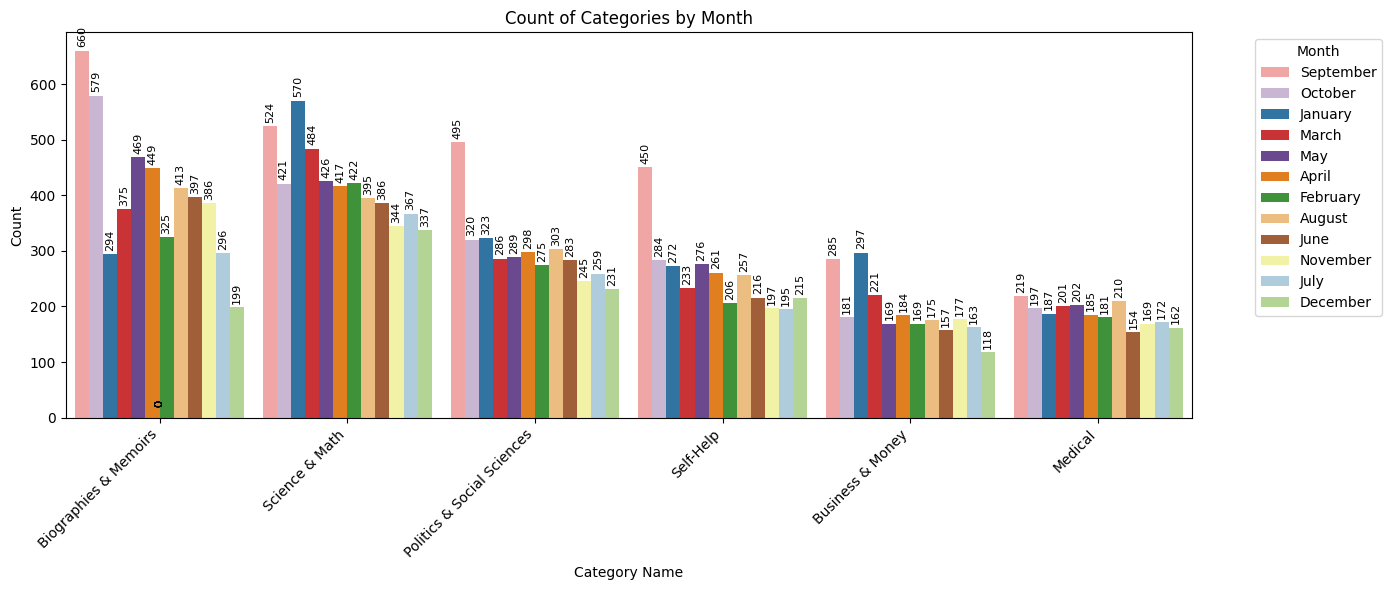

In [6]:
# To see which category sells the most and least in which month.

"""We can see from this graph that in September, book sales in the categories 'Business & Money' and 'Science & Math' 
    surpass those in the other four categories. For these two categories, the sales in September show a significant 
    difference from the average month and maintain the second-highest sales status. From this analysis, we can conclude
    that if we release books in certain predetermined categories in September, we can achieve higher sales."""


df['publishedDate']=pd.to_datetime(df['publishedDate'])    #change datatype of publishedDate column to datetime 
month_df=df
month_df['month']=month_df['publishedDate'].dt.month_name()   #add to month_df to new column with 'month' name
month_df

# To find the count of null rows in the 'publishdate' column for each category.
x=df[df['publishedDate'].isna()]['category_name'].value_counts().to_frame()       
x.rename(columns={'count':'nan olan count'},inplace=True) # to rename name of 'count' column to "nan olan count"
x

# To find the count of non-null rows in the 'publishdate' column for each category.
date_drdf=df.dropna(subset=['publishedDate']) 
date_drdf['publishedDate'].isna().sum()          #  for checking number of nan rows (0 non rows)
date_drdf=date_drdf['category_name'].value_counts().to_frame()
date_drdf.rename(columns={'count':'nan olmayan count'},inplace=True)   #to rename name of 'count' column to "nan olmayan count"
date_drdf

#merge 'x' and 'date_drdf' dataframes:
olan_ve_olmyan_df=pd.merge(x,date_drdf,left_index=True,right_index=True).sort_values(by='nan olmayan count',ascending=False)

# We are calculating the percentage ratio of the number of rows with NaN values to the total number of rows for each category.
formula=(olan_ve_olmyan_df['nan olan count']/(olan_ve_olmyan_df['nan olan count'] + olan_ve_olmyan_df['nan olmayan count']))*100
olan_ve_olmyan_df['faiz nisbeti']=formula
olan_ve_olmyan_df.sort_values(by='faiz nisbeti',inplace=True)
olan_ve_olmyan_df.reset_index(inplace=True)

# To filter out rows with a percentage of NaN values less than 15%. and tp find name of caterogies.
name_of_category=olan_ve_olmyan_df.loc[olan_ve_olmyan_df['faiz nisbeti'] < 15,'category_name'].to_list()
name_of_category    #list of categories names

#To retrieve only the rows of the filtered categories.
secilmis_cat_df=df[df['category_name'].isin(name_of_category)]
secilmis_cat_df=secilmis_cat_df.dropna(subset=['publishedDate'])   
zx=secilmis_cat_df[['month','category_name']].value_counts().to_frame()
zx.sort_index(level='month',sort_remaining=False)   #to sort only in month index


# for vizualisation of these categories
#---------------------------------------------------
# Define a larger color palette for each month
month_palette = {
    'January': '#1f78b4','February': '#33a02c','March': '#e31a1c','April': '#ff7f00',
    'May': '#6a3d9a','June': '#b15928','July': '#a6cee3','August': '#fdbf6f',
    'September': '#fb9a99','October': '#cab2d6','November': '#ffff99','December': '#b2df8a'}

# Create a vertical bar plot using seaborn with customized colors, increased width, and space between category names
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='category_name', y='count', hue='month', data=zx, palette=month_palette, dodge=True, width=0.9)

# Add count values on top of the bars with 90-degree rotation
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=90, fontsize=8)

# Set plot labels and title
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.title('Count of Categories by Month')

# Display the plot with rotated category names
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align to the right
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

     day  count
0    1.0   7715
6    2.0   2796
14   3.0   2550
3    4.0   2866
2    5.0   3081
5    6.0   2830
4    7.0   2844
16   8.0   2517
27   9.0   2247
17  10.0   2477
9   11.0   2652
7   12.0   2696
10  13.0   2628
11  14.0   2607
1   15.0   3410
20  16.0   2438
23  17.0   2369
8   18.0   2680
21  19.0   2438
22  20.0   2420
26  21.0   2320
13  22.0   2558
29  23.0   2109
28  24.0   2223
15  25.0   2550
12  26.0   2597
24  27.0   2354
18  28.0   2462
25  29.0   2352
19  30.0   2447
30  31.0   1853


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18204\1271814762.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='count', data=day_df, palette='viridis')


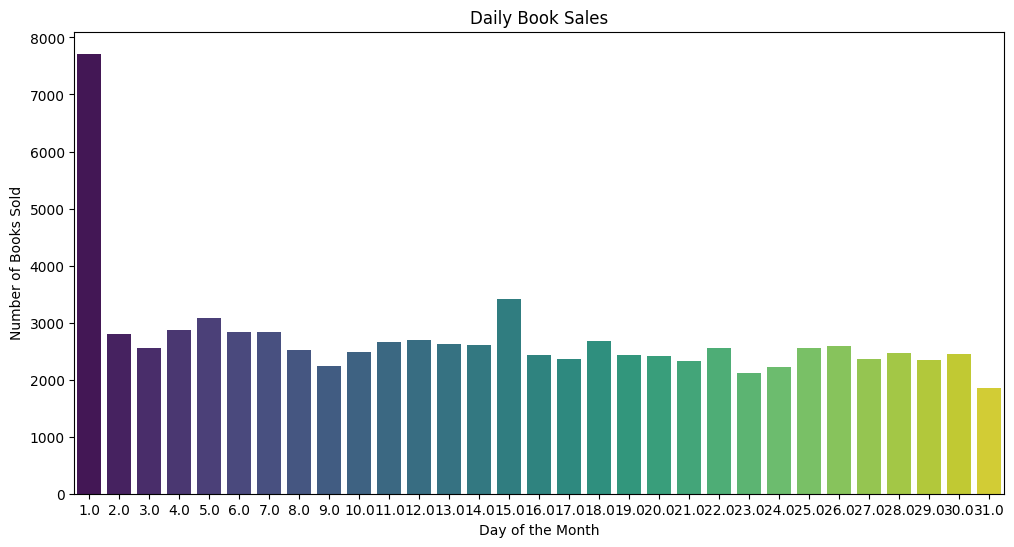

In [7]:
'''"The first day of each month is the highest sales day becausethe number (7715)is nearly three times
 higher than the average sales count on the remaining days (2694), calculated by taking the remainder.'''

df['publishedDate']=pd.to_datetime(df['publishedDate'])
day_df=pd.DataFrame()
day_df['day']=df['publishedDate'].dt.day
day_df=(day_df.value_counts()).to_frame().reset_index().sort_values(by='day')
print(day_df)


plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='count', data=day_df, palette='viridis')
plt.title('Daily Book Sales')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Books Sold')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18204\2390097471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


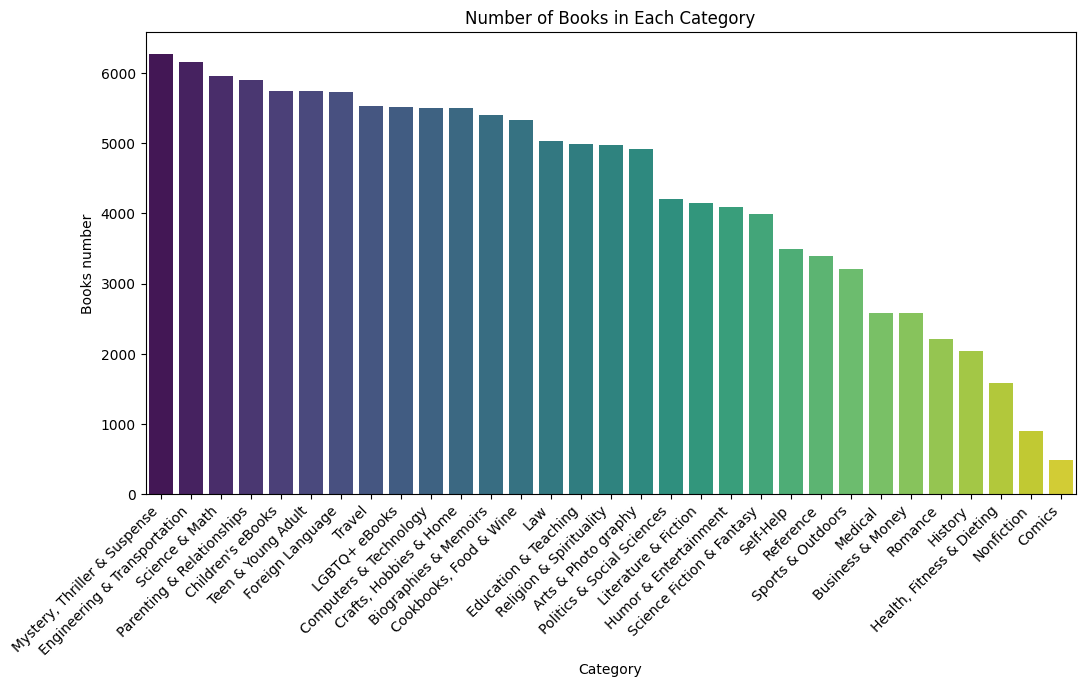

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18204\2390097471.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette="plasma")


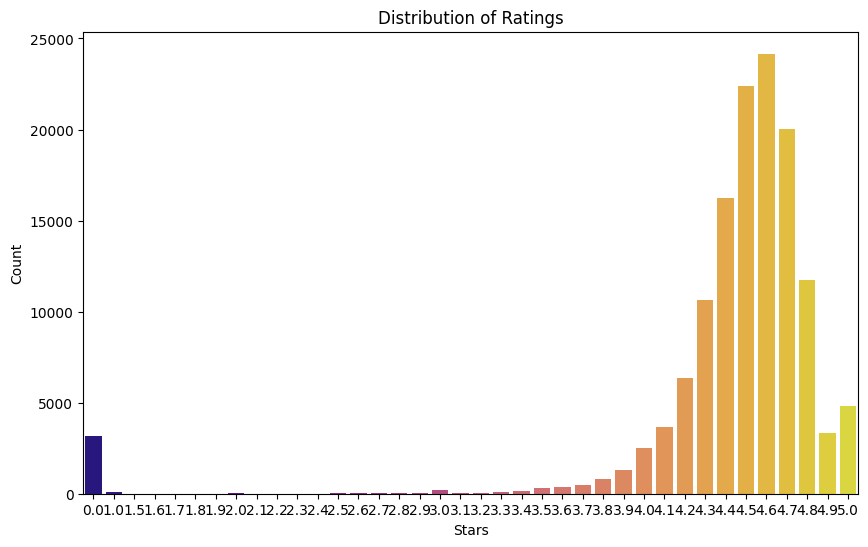

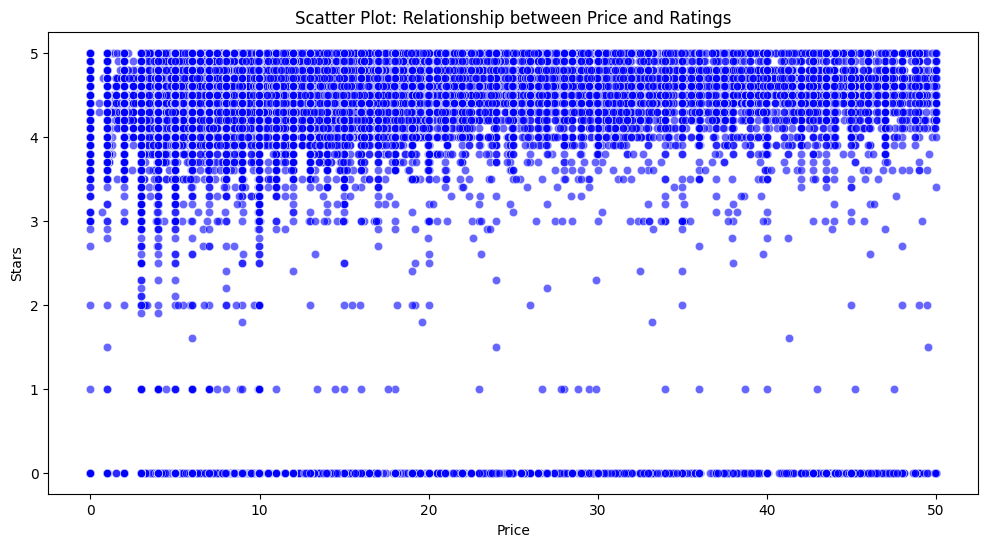

In [8]:
#### 5. Visualization:
# Create visualizations using Matplotlib and Seaborn to represent key insights from the data. For example:
# Bar charts for ratings or categories.
# Scatter plots to show the relationship between price and ratings.
#----------------------------------------------------------------------------

# 1) Bar charts for categories:
# Count the number of books in each category
"""In general, there is no empty row in the 'category_name' column.
 The best-selling category is 'Mystery, Thriller & Suspense' with 6272 sales, while the least-selling is 'Comics' with 478 sales. 
The difference in sales between these two categories is 5794."""

category_counts = df['category_name'].value_counts()
category_counts.count()   # checking How many categories are there (31 category)
# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Number of Books in Each Category')
plt.xlabel('Category')
plt.ylabel('Books number')
plt.xticks(rotation=45, ha="right")  # Rotate category names for better visibility
plt.show()

# -------------------------------------------------------------------
# 2) Bar charts for ratings:
# Count the distribution of ratings
"""If we look at the graph, we can observe that the distribution is concentrated between 4 and 5 stars, 
with the peak at 4.6 stars receiving the highest count of 24163. 
Another notable difference is the substantial count of 3182 for 0 stars."""
df['stars'].isna().sum() #for checking how many nan values are there. (0 nan value) 
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=df, palette="plasma")
plt.title('Distribution of Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

# -------------------------------------------------------------------
# 3) Scatter plots to show the relationship between price and ratings:
# Drop missing values in 'price' and 'stars', filter out extreme prices
"""As noted earlier, since a significant portion of the stars fall between 3.5 and 5, 
    the points are more concentrated in that range.Furthermore, we have set a maximum value of $50 for the books here. 
    Upon inspection, it is evident that 120,017 books are priced at less than $50, constituting a substantial majority,
      while a smaller fraction—6,375 books—exceeds the $50 threshold."""

drop_df_price_stars = df.dropna(subset=['price', 'stars']).reset_index()

drop_df_price_stars[drop_df_price_stars['price'] < 50]  #checking for count of books which less than 50 $  (120017)
drop_df_price_stars[drop_df_price_stars['price'] > 50]  #checking for count of books which more than 50 $  (6375)

drop_df_price_stars = drop_df_price_stars[drop_df_price_stars['price'] < 50]

# Plot a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='stars', data=drop_df_price_stars, color='blue', alpha=0.6)
plt.title('Scatter Plot: Relationship between Price and Ratings')
plt.xlabel('Price')
plt.ylabel('Stars')
plt.show()


In [9]:
#### 6. Author Analysis:
# Analyze the dataset to find information about the most prolific authors, best-rated authors, or authors with the highest sales.
#---------------------------------------------------

# The most prolific authors:
df_drop_author = df.dropna(subset=['author'])
prolific_authors = pd.DataFrame(df_drop_author['author'].value_counts()).reset_index()
prolific_authors.head()
print(f'The most prolific author is: {prolific_authors.iloc[0, 0]} with {prolific_authors.iloc[0, 1]} books')

# ---------------------------------
# Best-rated authors:
df_drop_author = df.dropna(subset=['author'])
best_rated_authors = df_drop_author.sort_values('stars', ascending=False)[df_drop_author['stars'] == 5]
best_rated_authors['author'].drop_duplicates(inplace=True)
best_rated_authors = best_rated_authors[['author', 'stars']]
best_rated_authors

# -------------------------------------------
# Authors with the highest sales:
df_drop_prices = df.dropna(subset=['price'])
highest_price_authors = df_drop_prices.sort_values(by='price', ascending=False)[['author', 'price']].head(5)
highest_price_authors


The most prolific author is: James Patterson with 212 books


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18204\2173571189.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  best_rated_authors = df_drop_author.sort_values('stars', ascending=False)[df_drop_author['stars'] == 5]


,author,price
123336,LexisNexis Editorial Staff,682.00
125981,Clifford E. Kirsch,662.00
15712,H. Richard Winn,636.99
123725,Jeffrey G. Sheldon,629.00
113257,C. G. Jung,549.99


In [10]:
#### 7. Category-wise Analysis:
# Break down the data by categories and analyze trends or patterns within each category.
#-----------------------------------------------------------------------------
# 7. Category-wise Analysis:

# Dropping rows with missing values in 'soldBy', 'author', and 'price'
df_drop_pr_aut_sdb = df.dropna(subset=['soldBy', 'author', 'price'])

# Grouping the data by 'category_name'
grouped_data = df_drop_pr_aut_sdb.groupby('category_name')

# Calculating the average values for 'stars', 'reviews', and 'price' within each category
averaged_df = grouped_data[['stars', 'reviews', 'price']].agg('mean')

# Calculating the total counts for 'isKindleUnlimited', 'isBestSeller', 'isEditorsPick', and 'isGoodReadsChoice' within each category
counted_df = grouped_data[['isKindleUnlimited', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice']].agg('sum')

# Displaying the averaged metrics by category
averaged_df

# Displaying the counted metrics by category
counted_df

,isKindleUnlimited,isBestSeller,isEditorsPick,isGoodReadsChoice
category_name,,,,
Arts & Photo graphy,565,68,83,15
Biographies & Memoirs,653,131,790,136
Business & Money,237,56,19,7
Children's eBooks,0,0,1,0
Comics,136,3,2,17
Computers & Technology,829,72,25,2
"Cookbooks, Food & Wine",1492,59,603,39
"Crafts, Hobbies & Home",1424,92,27,10
Education & Teaching,703,51,9,2


# Kindle Book Data Analysis Summary
Overview
This report delves into the analysis of Kindle book sales data, with the goal of uncovering trends in sales, identifying top-performing books, conducting author analysis, and exploring category-wise patterns.

## 1. Data Summary
The dataset contains information about Kindle books, including the following columns: asin, title, author, soldBy, imgUrl, productURL, stars, reviews, price, isKindleUnlimited, category_id, isBestSeller, isEditorsPick, isGoodReadsChoice, publishedDate, category_name.


Total Rows: [133102]
Total Columns: [15]
## 2. Data Cleaning
Missing values in the dataset were addressed through the following steps:
Author Column:
Filled missing authors with "Ann M. Martin" for titles containing "Baby-Sitters."
SoldBy Column:
Filled empty 'soldBy' entries with "Hachette Book Group" if the author is 'James Patterson.'

## 3. Data Analysis
1. Top-Selling Books Based on Ratings:

Sorted the dataset by ratings (stars).
Listed books with the highest ratings.
Filtered for books with a 5-star rating marked as bestsellers.
2. Average Price of Books in Different Categories:

Explored unique category names.
Calculated average prices for each category.
3. Correlation Between Stars and Reviews:

Excluded rows with missing values in 'stars' and 'reviews.'
Calculated the correlation coefficient between stars and reviews.
These analyses reveal insights into top-rated books, average prices by category, and the correlation between stars and reviews in the dataset.

## 4. Visualization Summary:
Books in Each Category:

Bar chart displaying the distribution of books across categories.
Category names rotated for better visibility.
Distribution of Ratings:

Bar chart illustrating the distribution of ratings.
Counted occurrences for each rating.
Price vs. Ratings Relationship:

Scatter plot visualizing the relationship between book prices and ratings.
Extreme prices filtered out for a focused view.
These visualizations offer insights into category-wise book distribution, rating distribution, and the correlation between book prices and ratings.
## 5.  Author Analysis Summary:

#### Most Prolific Authors:
| Rank | Author                 | Book Count |
|------|------------------------|------------|
| 1    | James Patterson        | 212        |
| 2    | DK Eyewitness          | 163        |
| 3    | DK                     | 155        |
| 4    | Captivating History    | 120        |
| 5    | Fodor's Travel Guides   | 115        |

#### Best-Rated Authors:
- Explored authors with a 5-star rating.
- Displayed authors with the highest rating and removed duplicates.

#### Authors with the Highest Sales:
| Rank | Author                     | Price      |
|------|----------------------------|------------|
| 1    | LexisNexis Editorial Staff | $682.00    |
| 2    | Clifford E. Kirsch          | $662.00    |
| 3    | H. Richard Winn             | $636.99    |
| 4    | Jeffrey G. Sheldon           | $629.00    |
| 5    | C. G. Jung                   | $549.99    |

These analyses offer insights into the most prolific authors, best-rated authors, and authors with the highest sales based on book counts, ratings, and prices.

#### 6. Category-Wise Exploration
Averaged Metrics by Category:
Average stars, reviews, and prices within each category were analyzed.
Counted Metrics by Category:
Total counts for Kindle Unlimited, Best Seller, Editor's Pick, and Goodreads Choice within each category were examined.
These analyses provide insights into the average metrics and counts for specific categories without presenting in tabular format.

#### Conclusion
The analysis offers valuable insights into Kindle book sales, providing understanding regarding top-performing books, author contributions, and category-wise trends.
